In [15]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [27]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [28]:
pdp = pd.read_csv(files[-1],compression='gzip')

In [29]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [3]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

In [4]:
ward_df.head()

,pcd7,pcd8,pcds,par11cd,par11nm,par11nmw,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
0,AL1 1AG,AL1 1AG,AL1 1AG,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
1,AL1 1AJ,AL1 1AJ,AL1 1AJ,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
2,AL1 1AR,AL1 1AR,AL1 1AR,NaN,NaN,NaN,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
3,AL1 1AS,AL1 1AS,AL1 1AS,NaN,NaN,NaN,E05004799,St Peters,NaN,E07000100,St Albans,NaN
4,AL1 1BH,AL1 1BH,AL1 1BH,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN


In [9]:
ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])
    

In [11]:
%store -r presc_Disease_prevalence

In [12]:
luca_data = pd.read_csv('../BL_Work/diabetes_estimates_osward_2016.csv')

In [114]:
ward_gt = {}
ward_luca_predict = {}
ward_patients_gt = {}
for index , row in luca_data.iterrows():
    ward_gt[row['osward']] = float(row['gp_patients_diabetes'])
    ward_patients_gt[row['osward']] = float(row['gp_patients'])
    ward_luca_predict[row['osward']] = row['diabetes_prevalence_estimated_from_prescriptions']

(array([  7.,  68., 158., 164., 108.,  53.,  31.,  12.,   0.,   2.]),
 array([   5. ,  220.2,  435.4,  650.6,  865.8, 1081. , 1296.2, 1511.4,
        1726.6, 1941.8, 2157. ]),
 <a list of 10 Patch objects>)

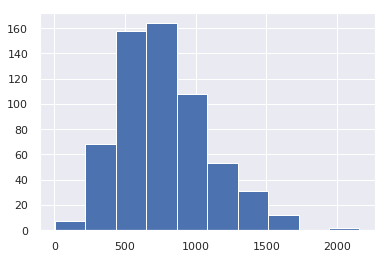

In [115]:
plt.hist(ward_gt.values())

In [113]:
pearsonr([ward_gt[k] for k in ward_gt],[ward_luca_predict[k] for k in ward_gt])

(0.7203983722552026, 1.3988923480224664e-97)

In [71]:
# ward_postcode_map

In [72]:
londonWardPostcode = {k : ward_postcode_map[k] for k in ward_gt if k in ward_postcode_map}

In [73]:
len(londonWardPostcode), len(ward_gt)

(540, 603)

In [74]:
diabetes_GP = presc_Disease_prevalence['201009']['diabetes']

In [75]:
# %store -r GP_postcodes

In [117]:
patients = pd.read_csv('../BL_Work/grondTruths/GP_SYOA.csv')
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['PRACTICE_CODE']] = row['Total_All']

In [118]:
patients_survey = pd.read_csv('../BL_Work/prevalence/DM.csv')
practice_surveypatient_dict = {}
for index , row in patients_survey.iterrows():
    practice_surveypatient_dict[row['practice_code']] = row['survey_takers']


In [124]:
practice_patient_dict

{'E84702': 2855,
 'E84701': 3873,
 'E84706': 2212,
 'E84704': 2285,
 'E84705': 2491,
 'E84708': 2178,
 'E84709': 10160,
 'Y02795': 2630,
 'B85014': 9805,
 'B85015': 9006,
 'B85016': 9377,
 'B85010': 6603,
 'B85011': 6274,
 'B85012': 10602,
 'B85018': 8788,
 'B85019': 16935,
 'N81032': 22494,
 'N81033': 7711,
 'N81030': 12032,
 'N81031': 5588,
 'N81036': 6141,
 'N81037': 8008,
 'N81034': 12096,
 'N81035': 10855,
 'N81038': 6511,
 'N81039': 10339,
 'N82046': 7877,
 'N82041': 6478,
 'N82048': 6702,
 'N82049': 5215,
 'G82162': 5001,
 'Y00105': 3792,
 'G82160': 11075,
 'G82161': 15023,
 'G82164': 10290,
 'G82165': 9231,
 'Y01851': 2889,
 'M82050': 8056,
 'M82051': 4647,
 'M82054': 3548,
 'M82055': 3981,
 'M82056': 13006,
 'M82057': 3663,
 'M82058': 3549,
 'M82059': 11636,
 'P81212': 4994,
 'H81647': 2326,
 'H81644': 8655,
 'H81643': 2232,
 'H81642': 3021,
 'H81641': 3383,
 'P81214': 4546,
 'P81215': 6131,
 'E85617': 2881,
 'M82620': 3731,
 'F81014': 15873,
 'F81015': 6698,
 'F81016': 5115,


In [125]:
common_GPs = set(practice_patient_dict.keys()).intersection(practice_surveypatient_dict.keys())

In [127]:
# common_GPs

In [129]:
pearsonr([practice_surveypatient_dict[k] for k in common_GPs],[practice_patient_dict[k] for k in common_GPs])

(0.9563669330721694, 0.0)

In [97]:
patients.head()

,PRACTICE_CODE,POSTCODE,PARENT_ORGANISATION_CODE,NHSE_AREA_TEAM,NHSE_REGION,Total_All,Total_Male,Total_Female,MALE_0_1,MALE_1_2,...,FEMALE_86_87,FEMALE_87_88,FEMALE_88_89,FEMALE_89_90,FEMALE_90_91,FEMALE_91_92,FEMALE_92_93,FEMALE_93_94,FEMALE_94_95,Female_95+
0,A81001,TS18 1HU,00K,Q45,Y54,4180,2036,2144,23,25,...,13,8,8,4,6,4,4,5,7,6
1,A81002,TS18 2AW,00K,Q45,Y54,19621,9665,9956,77,114,...,56,43,40,33,38,23,18,11,11,26
2,A81003,TS26 8DB,00K,Q45,Y54,3470,1830,1640,16,16,...,4,2,2,5,7,2,3,0,1,2
3,A81004,TS1 3BE,00M,Q45,Y54,9078,4694,4384,33,42,...,24,17,10,19,15,10,7,5,4,20
4,A81005,TS14 7DJ,00M,Q45,Y54,7918,3851,4067,33,34,...,26,21,18,10,17,12,7,9,6,15


In [130]:
ward_patients = {}
for k in GP_postcodes_long:
    postCode = GP_postcodes_long[k]
    for ward in londonWardPostcode:
        if postCode in londonWardPostcode[ward]:
            try:
                if ward not in ward_patients:
                    ward_patients[ward] = practice_surveypatient_dict[k]
                else:
                    ward_patients[ward] += practice_surveypatient_dict[k]
            except:
                continue

ward_patients_filtered = {k: ward_patients[k] for k in ward_patients if not np.isnan(ward_patients[k] )}

In [146]:
%store ward_patients_filtered

Stored 'ward_patients_filtered' (dict)


In [131]:
pearsonr([ward_patients_gt[k] for k in ward_patients_filtered],[ward_patients_filtered[k] for k in ward_patients_filtered])

(0.25623315117718093, 7.374274831030356e-08)

In [132]:
len(ward_patients)

429

In [133]:
filteredGPs = list(set(diabetes_GP.keys()).intersection(practice_surveypatient_dict.keys()).intersection(GP_postcodes_long.keys()))


In [134]:
# for index, row in  luca_data.iterrows():
#     if row['osward'] in ward_patients:
#         print ward_patients[row['osward']] , row['gp_patients']

In [136]:
ward_diabetes_prevalence= {}
ward_gp_prevalence = {}
for ward in ward_patients_filtered:
    for k in filteredGPs:
        postCode = GP_postcodes_long[k]
        if ward not in ward_gp_prevalence:
            ward_gp_prevalence[ward] = []
        if postCode in londonWardPostcode[ward]:
            ward_gp_prevalence[ward].append(float(diabetes_GP[k])*float(practice_surveypatient_dict[k]))
for ward in ward_gp_prevalence:
    ward_diabetes_prevalence[ward] = float(np.sum(ward_gp_prevalence[ward]))/float(ward_patients_filtered[ward]+1)


    

(array([ 10.,  58., 122., 116.,  83.,  29.,   8.,   1.,   1.,   1.]),
 array([0.13233129, 0.15126002, 0.17018875, 0.18911748, 0.20804621,
        0.22697493, 0.24590366, 0.26483239, 0.28376112, 0.30268985,
        0.32161857]),
 <a list of 10 Patch objects>)

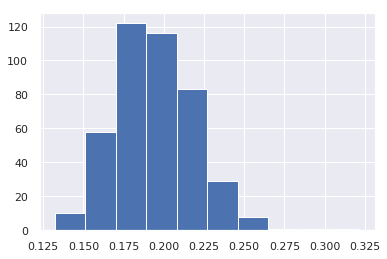

In [137]:
plt.hist(ward_diabetes_prevalence.values())

In [138]:
len(ward_diabetes_prevalence)

429

In [139]:
from sklearn import preprocessing

In [144]:
pearsonr([ward_gt[k] for k in ward_diabetes_prevalence],[ward_diabetes_prevalence[k] for k in ward_diabetes_prevalence])

(0.33145630519455677, 1.8501453383845056e-12)